In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
folder = Path("/mnt/home/azonca/s/pysm-data/websky/0.4/radio/")

In [4]:
radio_files = !ls $folder 

In [5]:
radio_files

['radio_0001.0.fits',
 'radio_0018.7.fits',
 'radio_0021.6.fits',
 'radio_0024.5.fits',
 'radio_0027.3.fits',
 'radio_0030.0.fits',
 'radio_0035.9.fits',
 'radio_0041.7.fits',
 'radio_0044.0.fits',
 'radio_0047.4.fits',
 'radio_0063.9.fits',
 'radio_0067.8.fits',
 'radio_0070.0.fits',
 'radio_0073.7.fits',
 'radio_0079.6.fits',
 'radio_0090.2.fits',
 'radio_0100.0.fits',
 'radio_0111.0.fits',
 'radio_0129.0.fits',
 'radio_0143.0.fits',
 'radio_0153.0.fits',
 'radio_0164.0.fits',
 'radio_0189.0.fits',
 'radio_0210.0.fits',
 'radio_0217.0.fits',
 'radio_0232.0.fits',
 'radio_0256.0.fits',
 'radio_0275.0.fits',
 'radio_0294.0.fits',
 'radio_0306.0.fits',
 'radio_0314.0.fits',
 'radio_0340.0.fits',
 'radio_0353.0.fits',
 'radio_0375.0.fits',
 'radio_0409.0.fits',
 'radio_0467.0.fits',
 'radio_0525.0.fits',
 'radio_0545.0.fits',
 'radio_0584.0.fits',
 'radio_0643.0.fits',
 'radio_0729.0.fits',
 'radio_0817.0.fits',
 'radio_0857.0.fits',
 'radio_0906.0.fits']

In [6]:
ref_pix = 189596988

In [7]:
radio_source = []
for filename in radio_files:
    print(filename)
    radio_source.append((
        float(filename.split("_")[1].replace(".fits","")), hp.read_map(folder / filename)[ref_pix]))

radio_0001.0.fits
radio_0018.7.fits
radio_0021.6.fits
radio_0024.5.fits
radio_0027.3.fits
radio_0030.0.fits
radio_0035.9.fits
radio_0041.7.fits
radio_0044.0.fits
radio_0047.4.fits
radio_0063.9.fits
radio_0067.8.fits
radio_0070.0.fits
radio_0073.7.fits
radio_0079.6.fits
radio_0090.2.fits
radio_0100.0.fits
radio_0111.0.fits
radio_0129.0.fits
radio_0143.0.fits
radio_0153.0.fits
radio_0164.0.fits
radio_0189.0.fits
radio_0210.0.fits
radio_0217.0.fits
radio_0232.0.fits
radio_0256.0.fits
radio_0275.0.fits
radio_0294.0.fits
radio_0306.0.fits
radio_0314.0.fits
radio_0340.0.fits
radio_0353.0.fits
radio_0375.0.fits
radio_0409.0.fits
radio_0467.0.fits
radio_0525.0.fits
radio_0545.0.fits
radio_0584.0.fits
radio_0643.0.fits
radio_0729.0.fits
radio_0817.0.fits
radio_0857.0.fits
radio_0906.0.fits


In [8]:
clon, clat, glon, glat = (32.86660645897463,
 -50.554023687565746,
 275.28891668590967,
 -62.06147137885603)

In [9]:
hp.ang2pix(4096,glon, glat, lonlat=True)

189596988

In [10]:
import pandas as pd

In [11]:
from pysm3 import units as u

In [12]:
source = pd.Series(dict(radio_source))

In [13]:
source *= hp.nside2pixarea(4096)

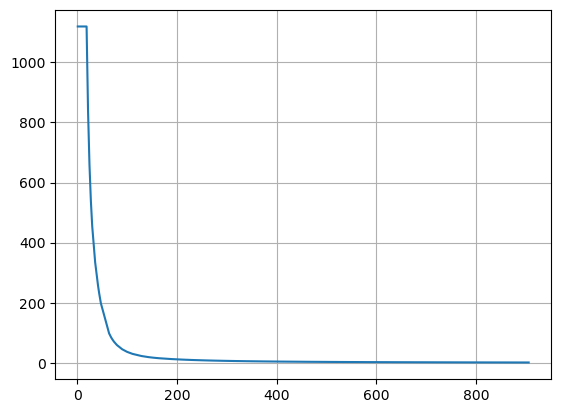

In [14]:
source.plot()
plt.grid()

In [15]:
source.index.name = "Frequency [GHz]"

In [16]:
source.name = "Flux [Jy]"

In [17]:
source

Frequency [GHz]
1.0      1118.939231
18.7     1118.939231
21.6      840.120014
24.5      659.359819
27.3      539.046646
30.0      454.752883
35.9      334.581129
41.7      256.735608
44.0      231.286054
47.4      198.320019
63.9       98.220286
67.8       85.489756
70.0       79.397402
73.7       70.603372
79.6       59.457063
90.2       45.445878
100.0      36.797509
111.0      30.059948
129.0      22.939004
143.0      19.313476
153.0      17.367454
164.0      15.659387
189.0      12.867762
210.0      11.140198
217.0      10.651881
232.0       9.720364
256.0       8.496283
275.0       7.703020
294.0       7.030701
306.0       6.655549
314.0       6.424601
340.0       5.762324
353.0       5.474302
375.0       5.039875
409.0       4.475575
467.0       3.733060
525.0       3.180436
545.0       3.021886
584.0       2.749299
643.0       2.410130
729.0       2.029748
817.0       1.736666
857.0       1.626833
906.0       1.507659
Name: Flux [Jy], dtype: float64

In [18]:
source.to_csv("reference_source_flux.csv")

In [19]:
!cat reference_source_flux.csv

Frequency [GHz],Flux [Jy]
1.0,1118.9392312025805
18.7,1118.9392312025805
21.6,840.1200141259575
24.5,659.3598191180173
27.3,539.0466463088762
30.0,454.75288313518087
35.9,334.5811290051253
41.7,256.73560825529364
44.0,231.2860535243519
47.4,198.3200191699082
63.9,98.22028598057739
67.8,85.48975589809163
70.0,79.39740192458936
73.7,70.60337245304362
79.6,59.457063222432055
90.2,45.44587802855091
100.0,36.797508792544825
111.0,30.059948116158353
129.0,22.939004481815772
143.0,19.31347583086452
153.0,17.36745362421729
164.0,15.65938653206007
189.0,12.867762218343415
210.0,11.14019819875719
217.0,10.651880661367159
232.0,9.72036391999957
256.0,8.49628275048866
275.0,7.703020179961499
294.0,7.030700689239765
306.0,6.655549486656838
314.0,6.424601486946642
340.0,5.762324181473161
353.0,5.474301625656665
375.0,5.039875259657876
409.0,4.475574643831067
467.0,3.733060162686023
525.0,3.18043632789292
545.0,3.0218855631366353
584.0,2.749298695998455
643.0,2.4101300904203313
729.0,2.02974796376285